In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# -------------------------
# Load & Preprocess Data
# -------------------------
df = pd.read_csv("/content/SC4001E0_comb.csv")

# Selecting relevant features
features = ['time', 'EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal',
       'EMG submental', 'Temp rectal', 'Event marker']
target_sleep_stage = "sleep_stage"  # Multi-class classification (Wake, Light, Deep, REM)

# Encode Sleep Stage labels (e.g., Wake=0, Light=1, Deep=2, REM=3)
label_encoder = LabelEncoder()
df[target_sleep_stage] = label_encoder.fit_transform(df[target_sleep_stage])

# Normalize features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Convert to numpy arrays
X = df[features].values
y_sleep_stage = df[target_sleep_stage].values  # Multi-class output

# -------------------------
# Reshape Data for LSTM
# -------------------------
SEQ_LENGTH = 30  # Use last 30 timesteps for prediction

def create_sequences(X, y_sleep_stage, seq_length):
    Xs, ys_sleep = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i + seq_length])
        ys_sleep.append(y_sleep_stage[i + seq_length])
    return np.array(Xs), np.array(ys_sleep)

X_seq, y_sleep_seq = create_sequences(X, y_sleep_stage, SEQ_LENGTH)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_sleep_seq, test_size=0.2, random_state=42)

# -------------------------
# Build LSTM Model
# -------------------------
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(SEQ_LENGTH, len(features))),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),

    # Output for Sleep Stage Classification
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes: Wake, Light, Deep, REM
])

# -------------------------
# Compile Model
# -------------------------
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# -------------------------
# Train Model
# -------------------------
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# -------------------------
# Evaluate Model
# -------------------------
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Sleep Stage Classification Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
5332/5332 ━━━━━━━━━━━━━━━━━━━━ 348s 64ms/step - accuracy: 0.9988 - loss: 0.0154 - val_accuracy: 1.0000 - val_loss: 4.8797e-09
Epoch 2/30
5332/5332 ━━━━━━━━━━━━━━━━━━━━ 411s 70ms/step - accuracy: 1.0000 - loss: 1.0806e-07 - val_accuracy: 1.0000 - val_loss: 2.7948e-12
Epoch 3/30
5332/5332 ━━━━━━━━━━━━━━━━━━━━ 378s 69ms/step - accuracy: 1.0000 - loss: 5.5625e-09 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/30
5332/5332 ━━━━━━━━━━━━━━━━━━━━ 325s 61ms/step - accuracy: 1.0000 - loss: 4.5906e-10 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/30
5332/5332 ━━━━━━━━━━━━━━━━━━━━ 391s 63ms/step - accuracy: 1.0000 - loss: 3.7158e-11 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/30
5332/5332 ━━━━━━━━━━━━━━━━━━━━ 330s 62ms/step - accuracy: 1.0000 - loss: 8.5632e-12 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/30
5332/5332 ━━━━━━━━━━━━━━━━━━━━ 384s 62ms/step - accuracy: 1.0000 - loss: 1.5717e-11 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/30
5332/5

In [ ]:
# Save the entire model (architecture + weights + optimizer state)
model.save("sleep_stage_lstm_model.h5")

In [ ]:
from tensorflow.keras.models import load_model

# Load the previously saved model
model = load_model("sleep_stage_lstm_model.h5")

# Check model architecture
model.summary()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
# -------------------------
# Load & Preprocess Data
# -------------------------
df = pd.read_csv("/content/SC4002E0_comb.csv")

# Selecting relevant features
features = ['time', 'EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal',
       'EMG submental', 'Temp rectal', 'Event marker']
target_sleep_stage = "sleep_stage"  # Multi-class classification (Wake, Light, Deep, REM)

# Encode Sleep Stage labels (e.g., Wake=0, Light=1, Deep=2, REM=3)
label_encoder = LabelEncoder()
df[target_sleep_stage] = label_encoder.fit_transform(df[target_sleep_stage])

# Normalize features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Convert to numpy arrays
X = df[features].values
y_sleep_stage = df[target_sleep_stage].values  # Multi-class output

# -------------------------
# Reshape Data for LSTM
# -------------------------
SEQ_LENGTH = 30  # Use last 30 timesteps for prediction
def create_sequences(X, y_sleep_stage, seq_length):
    Xs, ys_sleep = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i + seq_length])
        ys_sleep.append(y_sleep_stage[i + seq_length])
    return np.array(Xs), np.array(ys_sleep)

X_seq, y_sleep_seq = create_sequences(X, y_sleep_stage, SEQ_LENGTH)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_sleep_seq, test_size=0.2, random_state=42)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
# Compile the model again (if needed)
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower LR for fine-tuning
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train again on new data
history = model.fit(X_train, y_train,
                    epochs=15, batch_size=32,
                    validation_data=(X_test,y_test))


In [ ]:
# Save the retrained model
model.save("sleep_stage_lstm_retrained.h5")

In [ ]:
# Notes  - pickle the label encoder and apply during retraining
#        - try transformers instead of RNNs - LSTM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
8250/8250 ━━━━━━━━━━━━━━━━━━━━ 67s 8ms/step - loss: 587.7940 - mae: 12.6832 - val_loss: 5.5508 - val_mae: 2.0039
Epoch 2/20
8250/8250 ━━━━━━━━━━━━━━━━━━━━ 80s 8ms/step - loss: 44.1187 - mae: 4.6939 - val_loss: 11.4438 - val_mae: 2.9768
Epoch 3/20
8250/8250 ━━━━━━━━━━━━━━━━━━━━ 62s 7ms/step - loss: 22.0286 - mae: 2.6238 - val_loss: 6.7881 - val_mae: 2.2559
Epoch 4/20
8250/8250 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - loss: 17.6894 - mae: 1.9642 - val_loss: 5.7243 - val_mae: 2.0403
Epoch 5/20
8250/8250 ━━━━━━━━━━━━━━━━━━━━ 86s 8ms/step - loss: 17.3678 - mae: 1.9467 - val_loss: 6.5075 - val_mae: 2.1970
Epoch 6/20
8250/8250 ━━━━━━━━━━━━━━━━━━━━ 63s 8ms/step - loss: 17.8233 - mae: 1.9512 - val_loss: 6.5708 - val_mae: 2.2107
Epoch 7/20
8250/8250 ━━━━━━━━━━━━━━━━━━━━ 66s 8ms/step - loss: 18.3976 - mae: 1.9638 - val_loss: 5.7475 - val_mae: 2.0447
Epoch 8/20
8250/8250 ━━━━━━━━━━━━━━━━━━━━ 81s 8ms/step - loss: 17.4851 - mae: 1.9531 - val_loss: 6.0809 - val_mae: 2.1018
Epoch 9/20
8250/8250 

2063/2063 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


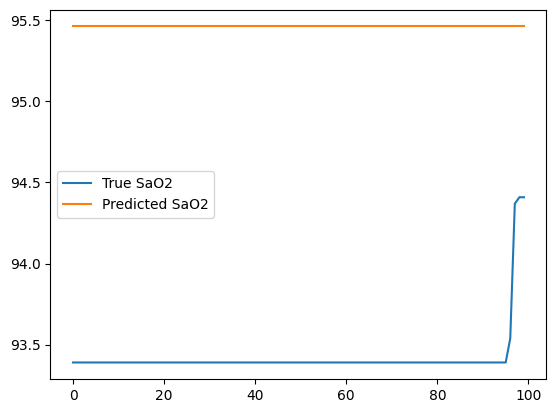

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the CSV file
file_path = "/content/1.csv"
df = pd.read_csv(file_path)

# Select input features (EEG, oxygen, etc.)
features = df.drop(columns=["SaO2"])  # Excluding SaO2 as target
target = df["SaO2"]  # Predicting oxygen saturation (apnea indicator)

# Normalize the data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Reshape input for LSTM: (samples, timesteps, features)
sequence_length = 10  # Using 10 timesteps for each prediction
X, y = [], []
for i in range(len(features_scaled) - sequence_length):
    X.append(features_scaled[i : i + sequence_length])
    y.append(target[i + sequence_length])

X, y = np.array(X), np.array(y)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(sequence_length, X.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation="relu"),
    Dense(1, activation="linear")  # Predicting continuous SaO2 values
])

# Compile model
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Save model
model.save("/content/sleep_apnea_model_SaO2.h5")

# Predict on test set
predictions = model.predict(X_test)

# Display some results
import matplotlib.pyplot as plt
plt.plot(y_test[:100], label="True SaO2")
plt.plot(predictions[:100], label="Predicted SaO2")
plt.legend()
plt.show()
